<a href="https://colab.research.google.com/github/suhongok/AIpractice/blob/main/catdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 1. 고양이와 개</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>학습 전제</h3>
<hr/>
<ul>
<li>머신러닝 또는 딥러닝을 활용해서 데이터를 분류(classification)하는 문제를 풀어봤다.</li>
<li>텐서플로우(TensorFlow)가 무엇인지 알며, 이를 활용해서 머신러닝/딥러닝 문제를 풀어봤다.</li>
<li>이미지 분류를 하는 CNN 계열의 Backbone 모델을 다뤄보지 않았다.</li>
<li>python의 기본적인 문법을 알며, 함수 또는 클래스를 다룰 수 있다.</li>
</ul>
<h3>학습 목표</h3>
<hr/>
<ul>
<li>이미지를 분류할 때 이미 잘 학습되어 있는 모델을 사용한다는 아이디어를 떠올릴 수 있다.</li>
<li>사전학습 모델인 Backbone 모델의 종류와 개념을 알고, Transfer Learning의 개념을 설명할 수 있다.</li>
<li>VGG, ResNet과 같은 기본적인 Backbone 모델을 불러와서 사용할 수 있다.</li>
<li>Backbone 모델을 원하는 레이어(layer)만큼 새로 학습시켜서 사용할 수 있다.</li>
<li>Backbone 모델을 Transfer Learning 시킴으로써 원하는 이미지를 분류시킬 수 있다.</li>
</ul>
<h3>목차</h3>
<hr/>
<h4>내가 직접 만드는 강아지 고양이 분류기</h4>
<ul>
<li>이미지 분류 문제</li>
<li>모델이 학습하려면? 공부할 데이터를 줘야지!</li>
<li>데이터가 있다고 끝은 아니야, 이쁘게 다듬는 작업은 필수!</li>
<li>데이터가 준비되었으니, 이제 모델을 만들어보자</li>
<li>모델아 모델아, 데이터를 먹고 똑똑해지렴!</li>
<li>모델은 얼마나 똑똑해졌을까? 확인해 보자!</li>
</ul>
<h4>내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기</h4>
<ul>
<li>어려운 문제는 직접 풀지 말자, 똑똑한 누군가가 이미 풀어놨을 테니!</li>
<li>아주 똑똑한 모델을 간단히 가져오는 방법</li>
<li>모델의 마지막 부분만, 내 입맛대로 재구성하기</li>
<li>거인의 어깨에 올라타서 예측하니, 더 잘 예측할 수밖에!</li>
<li>잘 학습된 모델은 저장해두고, 언제든 꺼내 쓰도록 하자!</li>
<li>거울아 거울아, 나는 멍멍이 상이니, 아니면 냥이 상이니?</li>
</ul>
<h4>프로젝트: 새로운 데이터셋(dataset)으로 나만의 이미지 분류기 만들어보기</h4>
<ul>
<li>데이터셋 선택하기</li>
<li>데이터셋을 모델에 넣을 수 있는 형태로 준비하기</li>
<li>모델 설계하기</li>
<li>모델 학습시키기</li>
<li>모델 성능 평가하기</li>
<li>모델 활용하기</li>
</ul></div><div class="MarkdownView_markdownView__loFxX"><blockquote>
<p>❗실습 전 한 가지 주의할 점!</p>
<p>실습 중 관련 패키지 버전 등의 이유로 경고 메시지가 출력될 수 있습니다.</p>
<p>아래 코드를 실행해 꼭 필요한 메시지 외 경고 메시지가 출력되지 않도록 해주세요.</p>
</blockquote></div><div id="block-56a89c12-8e79-4f45-bd 951f9ef30577-jupyter_block">

In [ ]:
import warnings
warnings.filterwarnings("ignore")

print("완료!")


완료!


</div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 2. 내가 직접 만드는 강아지 고양이 분류기 (1) 이미지 분류 문제</h1></div><div><div class="MarkdownView_markdownView__loFxX"><p>안녕하세요! 즐거운 딥러닝 실습 시간입니다.</p>
<p>여러분은 자신을 강아지 상이라고 생각하시나요, 아니면 고양이 상이라고 생각하시나요? 혹은, 주변 사람들은 어떻게 이야기하나요?</p>
<p>오늘은! 사람이 아닌 기계가 여러분의 사진을 분류하는 실습을 해 보겠습니다. 기계에게 강아지와 고양이 이미지를 학습시켜서 내 사진을 넣으면 어떤 판단을 하는지 확인해 보는 거죠!</p>
<p>어떤 결과가 나올지, 벌써부터 기대되지 않나요?!</p>
<p>자, 바로 실습을 시작해 보겠습니다. 앞으로 이미지를 넣었을 때 강아지인지, 고양이인지 분류하는 모델을 만들 것입니다.</p>
<p>텐서플로우(TensorFlow)를 활용해서 이미지를 분류할 수 있는 모델을 설계해 보겠습니다.</p>
<p>다음 코드를 실행해볼까요?</p></div><div id="block-75c02674-8ab6-48f2-a936-2192d5555563-jupyter_block">

In [ ]:
import tensorflow as tf
print(tf.__version__)


<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 3. 내가 직접 만드는 강아지 고양이 분류기 (2) 모델이 학습하려면? 공부할 데이터를 줘야지!</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>모델 학습을 위한 데이터셋(dataset) 준비하기</h3>
<hr/>
<p>가장 먼저 강아지와 고양이 이미지 데이터가 필요하겠죠! 텐서플로우에서 제공하는 데이터셋을 사용할 것입니다.</p>
<p>클라우드 사용자는 <code>tensorflow_datasets</code> 패키지가 이미 설치되어 있으므로 바로 패키지를 로드해 보겠습니다.</p></div><div id="block-202e6374-8c7e-45dd-a504-e94c97d602ce-jupyter_block">

In [ ]:
import tensorflow_datasets as tfds

tfds.__version__


'4.6.0'

</div><div id="block-32ddc4a6-113e-47b9-b391-a50a68b4b87f-jupyter_block">

In [ ]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(name='cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    download=True,
    with_info=True,
    as_supervised=True,)


In [ ]:
print(raw_train)


<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


</div><div class="MarkdownView_markdownView__loFxX"><p>각 데이터셋의 형태가 잘 출력되었군요.</p>
<p>모든 데이터셋은 <code>(image, label)</code>의 형태를 가집니다. <code>((None, None, 3), ())</code>가 이를 나타내죠. 여기에서 앞에 있는 <code>(None, None, 3)</code>은 image의 shape를, 뒤의 <code>()</code>는 정답 카테고리인 label의 shape를 의미합니다.</p>
<p>이미지는 <code>(height, width, channel)</code>로 3차원 데이터이기 때문에 <code>(None, None, 3)</code>과 같이 나타났습니다. 이때 <code>height</code>와 <code>width</code>가 <code>None</code>으로 나타난 이유는 무엇일까요?</p>
<p>잠시 뒤에 확인하겠지만, 모든 이미지의 크기가 전부 다르기 때문입니다. 정해져 있지 않은 사이즈이기 때문에 <code>None</code>으로 나타낸 거죠.</p>
<p>그렇다면 <code>3</code>이라는 숫자는 무엇을 나타낼까요?</p>
<p>이미지의 색을 표현하는 채널의 수를 나타냅니다. 컬러 이미지의 경우, 색은 RGB의 세 가지 색 조합으로 나타낼 수 있다는 것을 알고 있을 겁니다. 이미지를 컴퓨터상에 나타낼 때, 각 픽셀(pixel)의 색은 RGB의 세 가지 색의 조합으로 나타나기 때문에 컬러 이미지는 항상 3개의 채널을 가지고 있어야 하죠.<br/>
반면, 흑백 이미지는 white/black만 나타내면 되므로 단 하나의 채널만 있어도 충분합니다.</p>
<p>label은 특정 이미지가 강아지인지, 혹은 고양이인지를 나타내는 단일 값입니다. 단순히 1차원의 숫자 하나로 표현될 수 있기 때문에 차원이 따로 나타나지 않았습니다.</p></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 4. 내가 직접 만드는 강아지 고양이 분류기 (3) 데이터가 있다고 끝은 아니야, 이쁘게 다듬는 작업은 필수!</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>데이터 시각화를 통해 확인하고, 모델에 입력할 수 있는 형태로 전처리하기</h3>
<hr/>
<p>데이터에 대한 설명은 이 정도면 충분한 것 같으니, 바로 데이터를 직접 확인해봅시다. 일단 데이터를 확인하기 위해 <code>matplotlib</code> 라이브러리를 가져오겠습니다.</p></div><div id="block-a9ddbcb1-ba73-431a-84df-f5986436c64f-jupyter_block">

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print("슝~")


</div><div class="MarkdownView_markdownView__loFxX"><p><code>raw_train</code> 안에 있는 데이터를 확인해 보기 위해 <code>tf.data.Dataset</code>에서 제공하는 <code>take</code>라는 함수를 사용해 보겠습니다. 이 함수는 인수로 받은 만큼의 개수만큼의 데이터를 추출하여 새로운 데이터셋 인스턴스를 생성하여 리턴하는 함수입니다.</p>
<p>그럼 바로 다음 코드를 실행 시켜 보세요.</p></div><div id="block-85c3e2b0-e3c1-442d-b254-ea083c7e169e-jupyter_block">

In [ ]:
plt.figure(figsize=(20, 10))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')


</div><div class="MarkdownView_markdownView__loFxX"><p>10장의 사진을 확인해 보니 귀여운 강아지와 고양이 이미지들이 잘 섞여 있네요!</p>
<p>강아지는 <code>label 1</code>로, 고양이는 <code>label 0</code>으로 설정되어 있군요. 앞서 설명했듯 이미지의 사이즈는 전부 제각각이네요. 모델을 학습시킬 때에는 이미지 사이즈를 통일시켜 주는 작업을 해야할 것 같습니다.</p>
<p><code>format_example()</code> 함수를 이용해 이미지를 같은 포맷으로 통일 시켜 봅시다.</p>
<p>아래 코드는 이미지의 사이즈를 160x160 픽셀로 통일시킬 뿐만 아니라, 각 픽셀값의 scale을 수정해주는 역할도 합니다.</p>
<blockquote>
<p>‍🌈 간단 상식 - 타입캐스팅(Type Casting)<br/>
형변환이라고도 불리는 타입개스팅은 다른 데이터 타입으로 형(타입)을 바꿔주는 것을 의미합니다. 정수형을 실수형으로 바꾸기 위해 <code>float()</code>를 사용하는 것이 타입캐스팅의 한 예입니다.</p>
</blockquote></div><div id="block-c58bd51a-922b-4275-bd76-633f2acd87ce-jupyter_block">

In [ ]:
IMG_SIZE = 160 # 리사이징할 이미지의 크기

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1 # 픽셀값의 scale 수정
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

print("슝~")


슝~


In [ ]:
a = [1.2, 2.5, 3.7, 4.6] 
a = list(map(int, a))# 리스트의 요소를 정수로 변환 하여 리스트로 생성
a

b = list(map(str, range(10)))# 0~9까지 숫자를 만들고, str을 이용해서 문자열로 변환후 리스트 생성
b


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

</div><div class="MarkdownView_markdownView__loFxX"><p>map에 int와 리스트를 넣으면 리스트의 모든 요소를 int를 사용해서 변환합니다. 그다음에 list를 사용해서 map의 결과를 다시 리스트로 만들어줍니다.</p>
<p>b 는 range로 0부터 9까지 숫자를 만들고, str을 이용해서 모두 문자열로 변환했습니다. 리스트를 출력해보면 각 요소가 ' '(작은따옴표)로 묶인 것을 볼 수 있습니다.</p></div><div id="block-263d9857-f255-4d9c-9f75-58fb9f79cf52-jupyter_block">

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

print(train)
print(validation)
print(test)

<div class="MarkdownView_markdownView__loFxX"><p><code>IMG_SIZE</code>를 160으로 지정해 줌으로써, 모든 이미지의 크기를 <code>(160, 160, 3)</code>으로 통일시켰습니다.</p></div>

In [ ]:
plt.figure(figsize=(10, 5))


</div><div class="MarkdownView_markdownView__loFxX"><p>다시 이미지를 시각적으로 확인해 다시 확인해 보니 모든 이미지의 크기가 균일해진 것을 확인할 수 있습니다.</p></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 5. 내가 직접 만드는 강아지 고양이 분류기 (4) 데이터가 준비되었으니, 이제 모델을 만들어보자</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>텐서플로우를 활용해 모델 구조 설계하기</h3>
<hr/>
<p>이미지 준비가 끝났으니 이 이미지들로 학습시킬 모델을 만들어봅시다!</p>
<p>먼저 모델 생성에 필요한 다음 함수들을 가져오겠습니다. 아래에 있는 함수들은 앞으로 어떤 딥러닝 모델을 만들더라도 거의 항상 만나게 되는 친구들이니, 이름을 잘 익혀두는 것이 좋습니다.</p></div><div id="block-4236384f-8b99-445e-a85e-a3b42922d921-jupyter_block">

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

print("슝~")


슝~


</div><div class="MarkdownView_markdownView__loFxX"><p>위의 두 줄은 각각 <code>models</code>와 <code>layers</code>에서 가져왔다는 차이가 있군요.</p>
<p><code>models</code>는 모델 그 자체를 구축하기 위한 함수들을 포함하고 있고, <code>layers</code>에는 모델의 구성 요소인 여러 가지 종류의 레이어(layer), 즉 "층"이라는 함수들을 가지고 있죠. <code>Sequential</code>은 말 그대로 "연속적인" 모델을 쌓기 위한 함수입니다. <code>Sequential</code> 함수 안에 연속적으로 여러 가지 레이어들이 들어가죠.</p>
<p>위에서 가져온 함수들로 바로 모델을 만들어보며 더 구체적으로 살펴보겠습니다.</p></div><div id="block-13fb6ed9-824f-46bc-b17e-31a608096472-jupyter_block">

In [ ]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=2, activation='softmax')
])

print("슝~")


</div><div class="MarkdownView_markdownView__loFxX"><p>정확히는 몰라도 어디선가 본 것 같은 느낌이죠?!</p>
<p>앞으로 딥러닝에서의 <strong>레이어</strong> 라는 개념을 더 자세하게 고민해 보고 공부하겠지만, 딥러닝 모델은 언제나 위와 같이 여러 개의 층을 쌓은 형태로 구성됩니다. <code>Conv2D</code>, <code>MaxPooling2D</code>, <code>Flatten</code>, <code>Dense</code>라는 네 가지 종류의 레이어를 사용했네요.</p>
<p>모델의 전체 구조를 <code>summary</code>로 확인해봅시다.</p></div><div id="block-796d14d8-29c6-47af-888a-fdea4b993f5f-jupyter_block">

In [ ]:
model.summary()


</div><div class="MarkdownView_markdownView__loFxX"><p><code>summary()</code> 메소드는 모델의 전체 구조를 한눈에 보여줍니다.</p>
<p>앞서 말했듯이, 딥러닝 모델은 레이어가 층층이 쌓인 구조입니다. 저희가 모델에 입력하는 이미지의 크기가 몇이었죠?</p>
<p>네, <code>(160, 160, 3)</code>임을 이전에 확인했습니다.</p>
<p><code>summary()</code>에서 출력된 표는 <code>(160, 160, 3)</code> 크기의 이미지가 모델에 입력된 후 각 레이어를 지나면서 그 이미지의 사이즈가 어떻게 변화하는지를 나타내주고 있습니다. 처음 6개의 레이어를 지나고 난 후의 shape는 모두 <strong>(None, height, width, channel)</strong> 로 4차원입니다.</p></div><div class="quiz-block" id="block-9bbe3511-305c-4e6e-a7c0-a39b4bcf68b0-form_block"><div class="sc-chPdSV gVxYUA"></div></div><div class="MarkdownView_markdownView__loFxX"><p>첫 번째 차원은 데이터의 개수를 나타냅니다. 여기서는 정해지지 않은 수라는 <code>None</code> 기호로 표시되었네요. <code>None</code>은 배치(batch) 사이즈에 따라 모델에 다른 수의 입력이 들어올 수 있음을 나타냅니다.</p>
<p>데이터 하나의 크기는 <code>(height, width, channel)</code>로 3차원이죠. 6개의 레이어를 지나면서 height와 width는 점점 작아지고, channel은 점점 커지다가, flatten 계층을 만나 25,600(20x20x64)이라는 하나의 숫자로, 즉 1차원으로 shape가 줄어듭니다.</p>
<p>앞의 모델과 같이 점점 작은 feature map이 출력되다가, Flatten과 Dense 레이어를 거쳐 데이터가 1차원으로 줄어드는 네트워크는 CNN(Convolutional Neural Net)을 사용한 딥러닝 모델의 가장 대표적인 형태입니다.</p>
<p>이 전체 과정을 그림으로 확인해 보죠. 참고로 아래의 그림은 <a href="http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf" target="_blank">Gradient-Based Learning Applied to Document Recognition</a>라는 논문에 실린 그림입니다.</p>
<p></p></div><div class="MarkdownView_markdownView__loFxX"><p>맨 왼쪽처럼 이미지 한 장이 입력되면 그 이미지는 Convolutional(합성곱) 연산을 통해 그 형태가 점점 길쭉해지다가, Flatten 레이어를 만나면 오른쪽처럼 한 줄로 펴집니다. <strong>3차원의 이미지를 1차원</strong> 으로 펼치는 거죠.</p>
<p>Flatten을 조금 더 직관적으로 이해하기 위해 배열을 다루기 용이한 <code>numpy</code>를 활용해 보겠습니다.</p></div><div id="block-b8867824-e59b-4c46-b6f6-5b8dd2b294fb-jupyter_block">

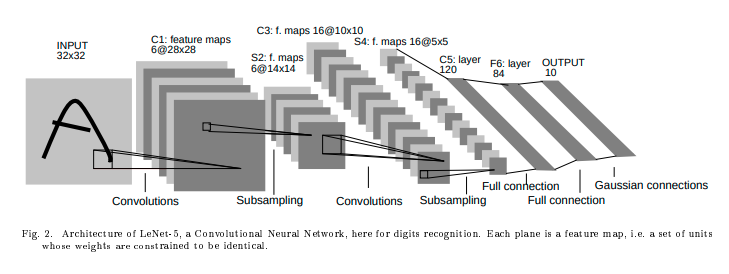

In [ ]:
import numpy as np
image = np.array([[1, 2], [3, 4]])
print(image.shape)
image

</div><div class="MarkdownView_markdownView__loFxX"><p>위와 같이 (2, 2) 크기의 이미지가 있을 때, 이를 <code>flatten</code>시키면 어떻게 될까요?</p></div><div id="block-fa23d3cd-9018-4453-997c-fc71895cd46d-jupyter_block">

In [ ]:
image.flatten()


array([1, 2, 3, 4])

</div><div class="MarkdownView_markdownView__loFxX"><p>모든 숫자를 일렬로 편 상태로 나타나게 됩니다. 모델에서 flatten 레이어를 통과한다는 것도 위와 같이 <strong>모든 숫자를 일렬로 펼쳐놓는 것</strong> 과 같습니다.</p>
<p>그 후 Dense 레이어에서 512개의 노드로 축소시켜 최종 출력은 단 두 개의 숫자로 구성된 하나의 <strong>확률분포</strong> 를 내뱉게 되죠. 이 두 숫자는 각각 입력된 이미지가 강아지일 확률과 고양이인 확률을 의미하게 될 것입니다.</p>
<p>정리해 보자면, 딥러닝 모델은 (160, 160, 3) 크기의 3차원 이미지를 입력받아 여러 레이어를 거치며 형태를 바꾸다가 최종적으로는 몇 개의 숫자를 출력해내는 함수라고 할 수 있습니다.</p>
<p>모델이 여기에서 어떻게 학습을 하며 어떻게 강아지와 고양이를 구별해낼 수 있는지는, 앞으로 점차 이론 내용들을 공부하며 알아볼 것입니다.</p></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 6. 내가 직접 만드는 강아지 고양이 분류기 (5) 모델아 모델아, 데이터를 먹고 똑똑해지렴!</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>모델 compile 완료 후 학습시키기</h3>
<hr/>
<p>그럼 이제 모델을 학습시켜보겠습니다!</p>
<p>모델이 학습하는 데에 필요한 "학습률"(<code>learning_rate</code>)이라는 파라미터를 <code>0.0001</code>로 설정해주고, 모델을 <code>compile</code> 하여 학습할 수 있는 형태로 변환해주도록 하겠습니다.</p></div><div id="block-775aa3cc-0926-4bc6-98e4-cc0edaded5a7-jupyter_block">

In [ ]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

print("슝~")


슝~


</div><div class="MarkdownView_markdownView__loFxX"><p><code>compile</code>을 하기 위해서는 세 가지가 필요합니다. 바로 <code>optimizer</code>, <code>loss</code>, <code>metrics</code> 라는 친구들입니다.</p>
<ul>
<li><code>optimizer</code>는 <strong>학습을 어떤 방식으로 시킬 것인지</strong> 결정합니다. 어떻게 최적화시킬 것인지를 결정하기 때문에 최적화 함수라고 부르기도 합니다.</li>
<li><code>loss</code>는 <strong>모델이 학습해나가야 하는 방향</strong> 을 결정합니다. 이 문제에서는 모델의 출력은 입력받은 이미지가 고양이인지 강아지인지에 대한 확률분포로 두었으므로, 입력 이미지가 고양이(label=0)일 경우 모델의 출력이 <code>[1.0, 0.0]</code>에 가깝도록, 강아지(label=1)일 경우 <code>[0.0, 1.0]</code>에 가까워지도록 하는 방향을 제시합니다.</li>
<li><code>metrics</code>는 <strong>모델의 성능을 평가하는 척도</strong> 입니다. 분류 문제를 풀 때, 성능을 평가할 수 있는 지표는 정확도(accuracy), 정밀도(precision), 재현율(recall) 등이 있습니다. 여기서는 정확도를 사용했습니다.</li>
</ul>
<blockquote>
<p>🎶 성능 평가 지표에 대한 자세한 내용은 <a href="https://sumniya.tistory.com/26" target="_blank">링크</a>를 참고하세요.</p>
</blockquote>
<p>이 세 가지를 모두 정해주면서 <code>compile</code>을 마무리하면 모델은 학습될 준비가 마무리된 것입니다.</p>
<p>그렇다면 이제는 모델을 학습시킬 데이터를 준비해야겠죠!</p>
<p>한 스텝에 학습시킬 데이터의 개수인 <code>BATCH_SIZE</code>와 학습 데이터를 적절히 섞어줄 <code>SHUFFLE_BUFFER_SIZE</code>를 설정해주겠습니다.</p></div><div id="block-bb6c4c2a-42e4-4f30-960a-436c127fb6dc-jupyter_block">

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
print("슝~")


슝~


</div><div class="MarkdownView_markdownView__loFxX"><p><code>BATCH_SIZE</code>에 따라 32개의 데이터를 랜덤으로 뿌려줄 <code>train_batches</code>, <code>validation_batches</code>, <code>test_batches</code>를 만들어 주겠습니다. <code>train_batches</code>는 모델이 끊임없이 학습될 수 있도록 전체 데이터에서 32개를 랜덤으로 뽑아 계속 제공해 줄 것입니다.</p></div><div id="block-56eb2c92-749c-4e1b-a7de-234dd7c714a6-jupyter_block">

In [ ]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)
print("슝~")


슝~


</div><div class="MarkdownView_markdownView__loFxX"><p><code>train_batches</code>에서 하나의 batch만 꺼내 데이터를 확인해볼까요?</p></div><div id="block-82206c72-2a27-46b8-8be4-68a734b7c2ed-jupyter_block">

In [ ]:
for image_batch, label_batch in train_batches.take(1):
    break

image_batch.shape, label_batch.shape


</div><div class="MarkdownView_markdownView__loFxX"><p><code>image_batch</code>의 shape는 <code>[32, 160, 160, 3]</code>을, <code>label_batch</code>의 shape는 <code>[32]</code>를 나타냅니다.</p></div><div class="quiz-block" id="block-d154ecdb-dac4-48f0-b255-02c72184344f-form_block"></div><div class="MarkdownView_markdownView__loFxX"><p>아직 모델은 학습하기 전입니다.</p>
<p>본격적으로 모델을 학습시켜보기 전에, 초기 모델의 성능은 어떤지 확인해 보겠습니다. validation(검증)을 하기 위한 데이터셋인 <code>validation_batches</code>를 이용해 20번의 예측을 해 보고, 평균 <code>loss</code>와 평균 <code>accuracy</code>를 확인해 보겠습니다.</p></div><div id="block-8208af81-7ee2-4584-ba97-5723d33b41c5-jupyter_block">

In [ ]:
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


</div><div class="MarkdownView_markdownView__loFxX"><p><code>loss</code>는 0.7이, <code>accuracy</code>는 약 50%가 나왔군요.</p>
<p>여기서 <code>loss</code>는 말 그대로 "손실"이라는 뜻으로, <strong>얼마나 모델이 틀렸는지</strong> 나타냅니다. 따라서 <code>loss</code>는 낮을수록 좋은 것이죠. 또한 <code>accuracy</code>는 <strong>몇 퍼센트의 정확도를 보이느냐</strong> 에 대한 수치입니다. 우리는 강아지와 고양이를 분류하려고 하는데, 두 장 중 하나를 찍어도 50%는 나올 테니 지금 모델은 전혀 의미 없는 예측을 하는 것이라고 할 수 있습니다.</p>
<p>그러면 10 epoch를 학습시켜서 정확도가 어떻게 변하는지 확인해 보겠습니다. 아래 코드는 학습 환경에 따라 약 10~20분 내외가 걸릴 수 있습니다. <code>(colab P100 GPU 기준 약 7분 내외)</code></p></div><div id="block-4da15c2f-594a-4416-b9de-b5b2808a58a6-jupyter_block">

In [ ]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

</div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 7. 내가 직접 만드는 강아지 고양이 분류기 (6) 모델은 얼마나 똑똑해졌을까? 확인해 보자!</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>모델 학습곡선 확인 및 예측 결과 시각화하기</h3>
<hr/>
<p>모두 학습이 되었나요? 총 10 epoch를 학습한 후, 정확도가 어느 정도까지 올랐나요?</p></div><div class="hchang-content__image" id="block-93f29903-9dcb-4539-978e-43e58a5dd299-image_block"><img alt="content img" src="https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-09-30_19-04-46.png"/></div><div class="MarkdownView_markdownView__loFxX"><p>위 그림은 모델 학습한 결과인데요, accuracy라는 것이 2개 있습니다.</p>
<ul>
<li>첫 번째 <code>accuracy</code>는 훈련 데이터셋에 대한 정확도입니다. 학습하고 있는 데이터에 대한 정확도이죠.</li>
<li>두 번째 <code>val_accuracy</code>는 검증 데이터셋에 대한 정확도입니다. 학습하지 않고 있는, 즉 해당 학습 단계에서 보지 않은 데이터에 대한 정확도이죠.</li>
</ul>
<p>훈련 데이터셋에 대한 정확도가 높은 것은 당연합니다. 지금 공부하고 있는 문제집에 대한 점수는 당연히 한 번도 보지 않은 시험지를 푸는 것보다 높게 나오겠죠.</p>
<p>10 epoch를 모두 학습한 후에는 훈련 데이터셋에 대한 정확도는 약 90% 남짓, 검증 데이터셋에 대한 accuracy는 약 80% 조금 못 미치게 나왔을 것입니다. 학습 단계에 따른 정확도 변화를 그래프로 확인해 보겠습니다.</p></div><div id="block-c8d3aac0-b994-4456-ba4d-c02e740f4054-jupyter_block">

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


</div><div class="MarkdownView_markdownView__loFxX"><p>정확도(accuracy)와 손실값(loss)에 대한 두 가지 그래프를 그려보았습니다. 두 그래프 모두 훈련 데이터셋에 대한 수치와 검증 데이터셋에 대한 수치를 나타냅니다.</p></div><div class="quiz-block" id="block-00c00b38-a649-427a-8cec-f5bc72aed063-form_block"></div><div class="MarkdownView_markdownView__loFxX"><p>training accuracy는 꾸준히 오르지만 validation accuracy는 어떤 한계선을 넘지 못하는 것으로 보입니다. 심지어 loss 그래프에서 training loss는 계속 안정적으로 줄어들지만, validation loss값은 특정 순간 이후로 다시 커지는 모습을 보입니다.</p>
<p>이러한 문제를 칭하는 용어는 <strong>과적합(Overfitting, 오버피팅)</strong> 입니다. 모델의 성능이 제대로 올라가려면 "학습하지 않은" 데이터에 대해서도 성능이 좋아야 하는데, 훈련 데이터만으로 계속 학습하다 보니 그 데이터에만 과도하게 적합(fitting) 되어서 일반화 능력이 떨어지게 되는 것이죠.</p>
<p>딥러닝 모델을 학습시킬 때는 과적합 문제를 예민하게 다루고, 과적합이 되지 않는 순간을 잘 잡아내 일반화가 잘 되는 모델로 학습시키는 것이 중요합니다.</p>
<p>그러면 마지막으로 검증 정확도(validation accuracy)가 80% 정도까지 올라간 우리 모델의 예측 결과를 확인해 보며 이번 step을 마무리하겠습니다.</p>
<p>모델의 예측 결과를 확인하고 싶을 때는 다음과 같이 <code>model.predict</code>를 활용합니다.</p></div><div id="block-92acf463-5c55-4f8b-983c-956b6088f635-jupyter_block">

In [ ]:
for image_batch, label_batch in test_batches.take(
1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    break

predictions


</div><div class="MarkdownView_markdownView__loFxX"><p><code>predictions</code>가 엄청난 소수점 값들로 이루어져 있군요. 이 값은 모델이 판단한 <code>[고양이일 확률, 강아지의 확률]</code>인데, <code>[1.0, 0.0]</code>에 가까울수록 label이 0인 고양이로, <code>[0.0, 1.0]</code>에 가까울수록 label이 1인 강아지로 예측했다고 볼 수 있습니다.</p>
<p>즉 고양이일 확률이 더 높으면 고양이로, 그렇지 않으면 강아지로 예측했다고 할 수 있겠군요.</p>
<p>prediction 값들을 실제 추론한 라벨(고양이:0, 강아지:1)로 변환해 보겠습니다.
실제로 모델이 각 이미지를 강아지라고 판단했는지, 고양이로 판단했는지 보기 위해서요!</p></div><div id="block-a016cab0-8969-46b6-95ff-ce48c8cb7aa4-jupyter_block">

In [ ]:
predictions = np.argmax(predictions, axis=1)
predictions


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

</div><div class="MarkdownView_markdownView__loFxX"><p>이제 32장의 image들과 32개의 label, 그리고 32개의 prediction을 얻었으니 각각을 시각화해서 확인하겠습니다.</p></div><div id="block-6fc55e44-a378-4319-bac0-ac6d80597f50-jupyter_block">

In [ ]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')


</div><div class="MarkdownView_markdownView__loFxX"><p>어떤가요?</p>
<p>대부분 맞았지만, 틀린 것도 종종 보입니다. 틀린 이미지들을 한 번 더 유심히 보세요. 모두 이해해주지는 못하더라도, 어딘가 다른 명확한 이미지들보다는 조금 어려웠을 수 있다는 생각이 들지 않나요?</p>
<p>위의 32개 이미지에 대해서는 예측(prediction)의 정확도(accuracy)가 몇일까요? 한번 위의 코드에서 필요한 부분만 빼내어, 직접 맞은 예측의 개수를 세는 코드를 만들어서 계산해 보세요!</p></div><div id="block-25965eae-a200-465a-94d8-b42c17ca09b8-jupyter_block">

In [ ]:
count = 0   # 정답을 맞춘 개수


</div><div class="block-detail_block" id="block-8b1c2ddf-9d21-4d77-831d-d4c0870f7fa1-detail_block"><details>
<summary><strong>예시 답안</strong></summary>
<pre><code class="hljs stata">
<span class="hljs-keyword">count</span> = 0   # 정답을 맞춘 개수
<span class="hljs-keyword">for</span> image, <span class="hljs-keyword">label</span>, prediction <span class="hljs-keyword">in</span> <span class="hljs-keyword">zip</span>(images, labels, predictions):
    correct = <span class="hljs-keyword">label</span> == prediction
    <span class="hljs-keyword">if</span> correct:
        <span class="hljs-keyword">count</span> = <span class="hljs-keyword">count</span> + 1

<span class="hljs-keyword">print</span>(<span class="hljs-keyword">count</span> / 32 * 100)   
</code></pre>
</details></div><div class="MarkdownView_markdownView__loFxX"><p>여기까지! 직접 모델을 설계해서 만들어보고, 학습시켜 보는 것까지 진행해 보았습니다.</p>
<p>그럼 이 다음에는?</p>
<p>네! 우리가 만든 모델 말고, 우리보다 똑똑하고 돈 많은 누군가가 이미 만들어 놓은 모델을 활용해 볼 것입니다! 우리는 약 80% 정도의 검증 정확도까지 달성했죠! 그럼 엄청나게 크고, 학습 시간도 오래 걸리는 모델을 이미 학습 시켜 놓은 것을 가져다 쓰면 어떨까요?</p>
<p>다음 단계로 얼른 넘어가 보시죠!</p></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 8. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (1) 어려운 문제는 직접 풀지 말자, 똑똑한 누군가가 이미 풀어놨을 테니!</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>이미지 분류 대회인 ILSVRC와 데이터셋 ImageNet</h3>
<hr/>
<p>지금까지 직접 분류 모델을 설계하고 구조를 짠 후, 학습시켜서 강아지와 고양이를 분류해 보았습니다.<br/>
하지만 사실 그것은 처음 접하는 과정이기 때문에 직접 실습을 해본 것일 뿐, 현실에서 이미지를 분류할 때는 절대 그렇게 모델을 직접 만들어서 사용하지 않습니다. (😧 네..? 그럼 우린 뭘 한 거죠?)</p>
<p>딥러닝 세계에서 이미지 분류는 굉장히 전통이 깊은 주제입니다. 이미 매우 많은 사람들이 시도해왔고, 정확도를 올리기 위해서도 굉장히 오랜 시간 동안 노력해왔죠.</p>
<p>심지어는 이미지 분류를 전문적으로 시도해 온 컴퓨터 비전 분야의 "올림픽"과 같은 대회도 있습니다.<br/>
바로 <strong>ILSVRC</strong>(ImageNet Large Scale Visual Recognition Challenge) 이죠. 다음 세 개의 글을 읽고 ILSVRC가 뭔지 알아봅시다.</p>
<ul>
<li><a href="https://bskyvision.com/425" target="_blank">ILSVRC 대회 (이미지넷 이미지 인식 대회) 역대 우승 알고리즘들</a></li>
<li><a href="https://www.sallys.space/blog/2018/01/26/cnn-imagenet/" target="_blank">CNN-Imagenet에 쓰인 주요 모델</a></li>
<li><a href="https://89douner.tistory.com/59" target="_blank">CNN 성능은 어떻게 평가하게 되나요?</a></li>
</ul></div><div class="quiz-block" id="block-ae9cb26b-a18a-4871-8298-c839a1c0595c-form_block"></div><div class="MarkdownView_markdownView__loFxX"><p>이미지 분류는 ILSVRC 대회를 통해 굉장히 빠르게 발전해왔습니다. 2017년 대회를 마지막으로 대회는 종료가 되었으며, 마지막 해의 우승 모델인 SeNet은 2.3%의 아주 낮은 오차율을 보였죠. 총 1,000개의 카테고리가 있는 수백만의 데이터를 분류하는 데 2.3%밖에 틀리지 않았다니, 정말 놀랍지 않나요?</p>
<p>그래서 우리는 이 대회에서 사용되었던 모델을 활용해 볼 것입니다.</p>
<p>하지만 잠깐, 의문점이 생기지 않나요?</p>
<p>대회에서 사용된 모델은 분명 1,000개의 카테고리를 맞추어야 하는 모델이었고, 학습한 데이터도 우리가 사용하는 데이터와 다른데, 어떻게 그 모델을 우리의 강아지 고양이 분류기에 활용할 수 있는 걸까요?</p>
<p>이러한 의문을 풀기 위해 한 가지 알고 가야 할 개념이 있습니다.<br/>
바로 <code>거인의 어깨에 서서</code> 문제를 푼다는, <strong>Transfer Learning(전이학습)</strong> 이죠.</p>
<h3>Transfer Learning</h3>
<hr/>
<p>다음 글을 읽어보며 Transfer Learning의 개념을 파악하고, 다음 질문들에 답해봅시다.</p>
<ul>
<li><a href="https://jeinalog.tistory.com/13" target="_blank">Transfer Learning｜학습된 모델을 새로운 프로젝트에 적용하기</a></li>
</ul></div></div><div class="MarkdownView_markdownView__loFxX"><p>Transfer Learning이 무엇인지 조금은 와닿으시나요?</p>
<p>간단히 말하자면, Transfer Learning은 누군가 이미 잘 만들어놓은 모델을 가져와서, 내 입맛에 맞게 일부분만 새로 학습시켜 사용하는 것입니다. Transfer Learning에는 여러 가지 전략이 있지만 우리는 그 중 "classifier" 부분만 새로 학습시키는, 즉 적은 부분만 새로 학습시키는 전략을 활용할 것입니다.</p>
<p>바로 다음 그림 중 세 번째 그림처럼 convolutional base는 모두 가만히 두고(freeze), 아래의 classifier 부분만 새로 학습시키는 거죠.</p></div><div class="hchang-content__image" id="block-a199d954-df8b-4e18-8559-1bae7a9f547b-image_block"><img alt="content img" src="https://d3s0tskafalll9.cloudfront.net/media/images/e-4-transfer.max-800x600_oqjiLxu.png"/><figcaption id="capt-' + elem.id + '">[Transfer Learning]</figcaption></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 9. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (2) 아주 똑똑한 모델을 간단히 가져오는 방법</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>사전 학습 모델인 VGG16을 가져오고, 모델의 구조 확인하기</h3>
<hr/>
<p>그렇다면 이제 설명은 그만, 바로 실행해 보죠!</p>
<p>우리는 2014년의 ILSVRC 물체 위치 찾기(localization) 태스크에서 우승한 VGG 모델을 사용해 보겠습니다.<br/>
2014년 이후 뛰어난 성능을 보이는 다양한 새로운 모델이 개발되었지만, VGG는 단순한 구조임에도 꽤나 괜찮은 성능을 보여서 아직까지 많은 이미지 처리 분야에서 사랑받는 모델 중 하나입니다.</p>
<p>다음의 간단한 코드로 VGG 모델을 <code>base_model</code>의 변수로 불러오겠습니다. 이전 스텝에 언급한 대로, VGG 모델을 가져올 때, output에 가까운 높은 레벨에 있는 3개의 FC 레이어는 제외하고 불러와야 하므로 <code>include_top=False</code> 옵션을 주었다는 것을 눈여겨 봐주세요.<br/>
텐서플로우 케라스에서 제공하는 VGG16 모델에 대한 상세한 내용은 아래 링크를 참고해 주세요.</p>
<p><a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16" target="_blank">텐서플로우 튜토리얼 - VGG16</a></p></div><div id="block-aea5743c-2020-4a4a-a0f6-273dee0e817b-jupyter_block">

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')


</div><div class="MarkdownView_markdownView__loFxX"><p>간단하죠? 우리는 방금 이미 잘 학습된 모델을 가져왔습니다.<br/>
이 모델은 입력된 이미지를 입력받으면 해당 이미지의 특징을 쏙쏙 잘 뽑아낸 특징 벡터를 추출해낼 수 있죠.</p>
<p>실제로 모델에 이미지 데이터가 들어가면 어떻게 되는지 확인해 보겠습니다.
우리가 학습할 때 사용했던 데이터인 <code>image_batch</code>를 넣어보죠.<br/>
넣기 전에 <code>image_batch</code>의 원래 사이즈를 다시 확인해봅시다.</p></div><div id="block-a77cf23f-d58d-4d8d-b0b0-51fdcef6126f-jupyter_block">

In [ ]:
image_batch.shape

TensorShape([32, 160, 160, 3])

</div><div class="MarkdownView_markdownView__loFxX"><p>위의 shape는 위에서 많이 확인해봤습니다.<br/>
다시 한번 짚어보면, 32는 이미지의 장수, 즉 32장의 이미지가 들어있다는 뜻이고, 각 이미지의 크기는 (160, 160, 3)이었습니다.<br/>
160은 각각 height와 width, 그리고 3은 채널 수로 R, G, B 3개였죠.</p>
<p>그렇다면 모델에 이 배치를 넣으면 shape가 어떻게 바뀔까요? 확인해봅시다.</p></div><div id="block-0509176d-9975-4f53-b7a5-7ce23f69ce3f-jupyter_block">

In [ ]:
feature_batch = base_model(image_batch)
feature_batch.shape

TensorShape([32, 5, 5, 512])

</div><div class="MarkdownView_markdownView__loFxX"><p>어떤가요? 이미지의 개수는 32장으로 여전히 같은데, 이미지의 사이즈가 많이 달라졌습니다.<br/>
height와 width는 각각 5로 매우 작아졌고, 512로 channel이 늘어났군요.</p>
<p>이 벡터는 이미지에서 특징을 추출해 낸 "특징 벡터"라고 부르기도 합니다.</p>
<p>그렇다면 모델 구조는 어떤지 살펴볼까요?</p></div><div id="block-10f89186-1253-455f-ae2c-c64c7dbb9048-jupyter_block">

In [ ]:
base_model.summary()

</div><div class="MarkdownView_markdownView__loFxX"><p>와, 우리가 만들었던 것보다는 분명 복잡해 보이네요.<br/>
여러 개의 행이 있다는 것은, 그만큼 레이어의 개수가 많다는 뜻입니다.</p>
<p>모델의 구조는 무엇보다도 그림으로 확인하는 것이 가장 직관적이겠죠.<br/>
다음 포스팅에서 모델 구조를 구경하고 옵시다.</p>
<ul>
<li><a href="https://neurohive.io/en/popular-networks/vgg16/" target="_blank">VGG16 – Convolutional Network for Classification and Detection</a></li>
</ul></div></div><div class="hchang-content__image" id="block-6fd68cf9-ca9a-465a-9230-4ad39a2fc47b-image_block"><img alt="content img" src="https://d3s0tskafalll9.cloudfront.net/media/images/e-4-3-1.max-800x600.png"/></div><div class="MarkdownView_markdownView__loFxX"><p>네, VGG16 모델은 위와 같은 구조로 되어 있습니다.<br/>
이미지가 Input 부분에서 입력되면 여러 개의 레이어를 거친 후 Output으로 출력되죠.</p>
<p>다만, 우리는 이 모델을 그대로 쓰지 않고 Transfer Learning 시킬 것이기 때문에 Dense Layer는 쓰지 않습니다. 이 부분은 우리가 새로 만들어주어야 합니다.</p>
<p>그러면, 모델의 끝 부분을 커스터마이징 해 보러 가시죠!</p></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 10. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (3) 모델의 마지막 부분만, 내 입맛대로 재구성하기</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>VGG16 끝단에 classifier 레이어를 붙여서 원하는 구조의 분류 모델 만들기</h3>
<hr/>
<p>VGG16 모델을 가져와서 모델이 이미지로부터 특징을 추출하는 벡터, 즉 특징 벡터를 내뱉는다는 것을 확인했습니다.</p>
<p>그럼 이제 모델이 추출한 특징 벡터로부터 분류를 할 수 있는 classifier를 우리가 구성해야 하는데요! 한 가지 이슈가 있습니다. VGG16 모델이 출력한 벡터의 shape가 무엇이었는지 기억하나요?</p></div></div><div class="MarkdownView_markdownView__loFxX"><p>기억이 잘 나지 않는다면 바로 확인해볼까요?</p></div><div id="block-b5229e51-4b8a-4012-9442-d8cd9806a79c-jupyter_block">

In [ ]:
feature_batch.shape


TensorShape([32, 5, 5, 2048])

</div><div class="MarkdownView_markdownView__loFxX"><p>(5, 5, 512) 크기의 벡터가 32개 있는 (32, 5, 5, 512)였습니다.</p>
<p>그런데 classifier를 구성하려면 Fully connected 레이어로 구성해야 합니다. Fully connected 레이어는 말 그대로 완전연결 계층인데요, 다음과 같이 생겼습니다.</p></div><div class="hchang-content__image" id="block-b03011aa-4a45-488e-83b9-22e95eb1acb8-image_block"><img alt="content img" src="https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-10-01_15-54-29.max-800x600.png"/><figcaption id="capt-' + elem.id + '">[Fully Connected Layer]</figcaption><a href="https://www.researchgate.net/figure/Types-of-pooling-d-Fully-Connected-Layer-At-the-end-of-a-convolutional-neural-network_fig3_337105858" rel="noopener noreferrer" target="_blank">https://www.researchgate.net/figure/Types-of-pooling-d-Fully-Connected-Layer-At-the-end-of-a-convolutional-neural-network_fig3_337105858</a></div><div class="MarkdownView_markdownView__loFxX"><p>말 그대로 이전 계층의 모든 숫자들이 다음 계층의 모든 숫자와 연결이 되어야 하죠. 이러한 구조로 인해 Fully connected 레이어에 입력될 수 있는 벡터는 <strong>반드시 1차원이어야 합니다.</strong></p>
<p>하지만 VGG16이 출력하는 벡터는 몇 차원이었죠?</p>
<p>(5, 5, 512)로 3차원의 구조를 가졌습니다. 따라서 우리는 classifier를 구성하기 전에 이 3차원 벡터를 1차원 벡터로 변환하는 작업을 거쳐야 합니다.</p>
<p>잠깐, 우리는 사실 위에서 우리만의 모델을 만들며 이러한 작업을 한 번 했었습니다. 무슨 계층이었을까요?</p></div><div class="quiz-block" id="block-e115f43e-0646-4eb6-a6cb-1864bbea96cb-form_block"></div><div class="MarkdownView_markdownView__loFxX"><p>Flatten 레이어 혹시 기억나시나요?</p>
<p>3차원이었던 벡터를 일렬로 쭉 펴는 역할을 하는 계층이 바로 Flatten 레이어였습니다.</p>
<p>잘 기억이 나지 않는다면 다음 코드를 다시 한번 돌리며 복습해 보죠.</p></div><div id="block-ef228fa9-c4d1-4011-836e-b9f91bb8557b-jupyter_block">

In [ ]:
import numpy as np

image = np.array([[1, 2],
                  [3, 4]])

flattened_image = image.flatten()

print("Original image:\n", image)
print("Original image shape:", image.shape)
print()
print("Flattened image:\n", flattened_image)
print("Flattened image shape:", flattened_image.shape)


Original image:
 [[1 2]
 [3 4]]
Original image shape: (2, 2)

Flattened image:
 [1 2 3 4]
Flattened image shape: (4,)


</div><div class="MarkdownView_markdownView__loFxX"><p>2차원의 이미지를 flatten하면 위와 같이 1차원의 이미지로 쭉 펼 수 있었습니다.</p>
<p>하지만 이번에는 조금 다른 방법을 사용할 것입니다. 2차원 또는 3차원 벡터를 1차원으로 축소하는 방법에는 Flattening 하는 것보다 조금 더 좋은 방법이 있거든요.</p>
<p>그 방법은 바로 <strong>Global Average Pooling</strong> 입니다. 다음 글을 통해 Global Average Pooling이 어떤 작업을 하는 연산인지 알아보죠.</p>
<ul>
<li><a href="https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/blocks/2d-global-average-pooling" target="_blank">Global Average Pooling</a></li>
</ul></div></div><div class="hchang-content__image" id="block-0282c6a7-d014-4d95-b95d-44185ba57c90-image_block"><img alt="content img" src="https://d3s0tskafalll9.cloudfront.net/media/images/e-4-3-3.max-800x600.png"/><a href="https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/blocks/global-average-pooling-2d" rel="noopener noreferrer" target="_blank">https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/blocks/global-average-pooling-2d</a></div><div class="MarkdownView_markdownView__loFxX"><p>Global Average Pooling은 위와 같이 3차원의 벡터가 있을 때, 겹겹이 쌓여있는 2차원 배열의 평균을 구한 후 하나의 값으로 축소하는 기법입니다.</p>
<p>위 그림에서는 왼쪽의 3차원 배열에서 맨 앞 장인 <code>[[1, 5, 4, 5], ..., [8, 6, 8, 7]]</code> 에 있는 16개 숫자의 평균을 구하면 '5'라는 숫자가 되죠.</p>
<p>이와 같이 <strong>평균값을 활용해 벡터의 차원을 줄이는 방법</strong> 을 Global Average Pooling이라고 합니다.</p></div></div><div class="MarkdownView_markdownView__loFxX"><p>그러면 바로 Global Average Pooling 계층을 만드는 코드를 확인해 보겠습니다.</p></div><div id="block-05ce39a7-07be-4310-99d6-76a38058abc0-jupyter_block">

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

</div><div class="MarkdownView_markdownView__loFxX"><p>이 <code>global_average_layer</code>에 위에서 VGG16이 출력했던 <code>feature_batch</code>를 입력하면 어떻게 될까요?</p></div><div id="block-2715503c-ccba-4b27-8c3d-40e748f61384-jupyter_block">

In [ ]:
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


</div><div class="MarkdownView_markdownView__loFxX"><p>네, 예상대로 (32, 512)의 벡터가 나오는군요. 평균이 잘 취해진 것 같습니다.</p>
<p>그렇다면 이제 여기에 마지막으로! Dense 레이어들을 붙여주면 우리의 classifier가 완성됩니다.</p></div><div id="block-dda966d7-8f45-4cab-a6b9-c3ba180acaa3-jupyter_block">

In [ ]:
dense_layer = tf.keras.layers.Dense(512, activation='relu')
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')

# feature_batch_averag가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)


(32, 2)


</div><div class="MarkdownView_markdownView__loFxX"><blockquote>
<p>❔ 혹시 <code>activation='relu'</code>와 <code>activation='softmax'</code>에 대해 궁금증이 생기셨나요?
<code>activation</code>은 활성화 함수를 의미하는 것으로, 입력값을 non-linear한 방식으로 출력값을 얻기 위해 사용합니다. 활성화 함수로는 다양한 함수가 사용되지만 위에서는 <code>relu</code>와 <code>softmax</code>가 사용되었죠.</p>
<p>활성화 함수에 대한 내용을 다루려면 깊게 들어가야 하므로 여기서는 다루지 않겠습니다. 활성화 함수에 대해 궁금하신 분은 아래의 자료를 참고하세요.</p>
<ul>
<li><a href="https://ganghee-lee.tistory.com/30" target="_blank">활성화 함수(activation function)을 사용하는 이유</a></li>
<li><a href="https://ynebula.tistory.com/42" target="_blank">[Deep Learning-딥러닝]Activation Function-활성화 함수(Sigmoid, Hyperbolic Tangent, Softmax, ReLu)</a></li>
</ul>
</blockquote>
<p>이제 우리만의 모델을 만들 준비는 모두 끝났습니다.</p>
<p>우리의 데이터들은 처음에 이미지에서 특징을 추출해 줄 VGG16, <code>base_model</code>에 입력되어 특징이 추출된 다음, 그 특징 벡터는 <code>global_average_layer</code>를 거쳐 마지막에 <code>prediction_layer</code>까지 통과하며 강아지인지, 고양이인지 예측이 될 것입니다.</p>
<p>여기에서, VGG16에 해당하는 <code>base_model</code>은 학습을 시키지 않을 예정이니 학습 여부를 결정하는 <code>trainable</code> 변수를 <code>False</code>로 지정해 "꺼주겠"습니다.</p></div><div id="block-e5a2a0ea-e292-4890-8690-90174c9b11d6-jupyter_block">

In [ ]:
base_model.trainable = False
print("슝~")


슝~


</div><div class="MarkdownView_markdownView__loFxX"><p>그럼 이제 진짜 최종 모델을 만들어보죠.</p></div><div id="block-a6c6d12c-92bd-49c0-80c6-24dbeb8fcfde-jupyter_block">

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])

</div><div class="MarkdownView_markdownView__loFxX"><p>예! 완성입니다.</p>
<p>모델의 구조를 확인해볼까요?</p></div><div id="block-854be662-da4a-408f-98bc-3491a7a3b2ed-jupyter_block">

In [ ]:
model.summary()


</div><div class="MarkdownView_markdownView__loFxX"><p>간결하네요.</p>
<p>사실 VGG16 안에는 위에서 봤던 매우 복잡한 레이어들이 들어있는데, 우리가 <code>base_model</code>로 추상화시켰기 때문에 간결하게 나타납니다.</p>
<p>모델이 완성되었으니, 이제 학습만 시키면 되겠군요! 다음 노드로 넘어가서 진행해 보도록 합시다!</p></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 11. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (4) 거인의 어깨에 올라타서 예측하니, 더 잘 예측할 수밖에!</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>VGG16을 기반으로 구성된 이미지 분류기를 학습시키고, 직접 만들었던 모델과 결과 비교해 보기</h3>
<hr/>
<p>자, 이제 모델 학습은 위에서 했던 과정과 같습니다.</p>
<p><code>optimizer</code>, <code>loss</code>, <code>metrics</code>를 준비해서 모델을 compile 하기만 하면 되죠.</p></div><div id="block-b41df51d-5b66-4632-b4b2-f2b0a5e4a971-jupyter_block">

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


</div><div class="MarkdownView_markdownView__loFxX"><p>자, 그러면 위에서 했던 것처럼 초기 손실과 정확도 값을 확인해 봅시다.</p>
<p>아직 학습이 되지 않은 상태니, 50% 정도를 예상해볼 수 있겠어요!</p></div><div id="block-372f4ec6-2851-479b-b667-9d13077d8832-jupyter_block">

In [ ]:
validation_steps=20
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0)
)


</div><div class="MarkdownView_markdownView__loFxX"><p>역시 50% 정도로, 무의미하게 두 선택지 중 하나로 찍는 상태인 것 같군요.</p>
<p>그럼 이제 어서, 모델을 학습시켜 보겠습니다! 과연 최종 성능은 어떨까요?! 가보시죠!</p></div><div id="block-036ac0cc-7c05-498a-b4b2-00245fc3eff8-jupyter_block">

In [ ]:
EPOCHS = 5   # 이번에는 이전보다 훨씬 빠르게 수렴되므로 5Epoch이면 충분합니다.

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)


</div><div class="MarkdownView_markdownView__loFxX"><p>와, 최종 정확도를 좀 보세요! 90%를 넘어섰습니다.</p>
<p>그래프로 학습 과정을 살펴봅시다.</p></div><div id="block-1a2b7220-026c-4f19-a19f-21da25bd1c61-jupyter_block">

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


</div><div class="MarkdownView_markdownView__loFxX"><p>우리가 직접 만들었던 모델과는 다르게 시작부터 75%를 넘는 정확도에서 꾸준히 올라갈뿐더러 <code>validation loss</code>도 매우 안정적으로 학습됩니다.<br/>
역시, 잘 학습된 모델을 가져와서 쓰는 게 최고군요!</p>
<p>위에서 했던 것과 같이 또 32개의 test sample에 대한 예측 결과를 눈으로도 확인해 보겠습니다.<br/>
샘플을 <code>test_batches</code>에서 가져와서 예측 결과를 만들어보죠!</p></div><div id="block-520c7bfc-ee7b-46be-80c2-5dac77b3fa25-jupyter_block">

In [ ]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions


</div><div class="MarkdownView_markdownView__loFxX"><p>역시 0과 1 사이의 값으로 확률값을 출력하였습니다.</p>
<p>이번에도 prediction 값들을 실제 추론한 라벨(고양이:0, 강아지:1)로 변환해 보겠습니다.</p></div><div id="block-50054af0-d1b1-4cb0-a0f7-fb32dda67691-jupyter_block">

In [ ]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions


array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

</div><div class="MarkdownView_markdownView__loFxX"><p>좋습니다! 바로 확인해봅시다.</p></div><div id="block-c57c740a-ed7e-4f08-aa40-0d8601e7e3d9-jupyter_block">

In [ ]:
plt.figure(figsize=(20, 12))


<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

</div><div class="MarkdownView_markdownView__loFxX"><p>와! 어떤가요?</p>
<p>확실히 아까보다 훨씬 잘 맞추는군요! 어려울 수 있는 이미지들에 대해서도 거의 틀리지 않습니다.<br/>
이번에도 32개에 대한 정확도를 확인해볼까요?</p></div><div id="block-1b28d933-1021-4c03-8436-73b8315f9a8c-jupyter_block">

In [ ]:
count = 0


</div><div class="MarkdownView_markdownView__loFxX"><p>거의 100%에 가까운 정확도를 보여줍니다.</p>
<p>이렇게 Transfer Learning의 위력을 실감할 수 있네요. 확실히, 이미지를 분류할 때는 직접 모델을 만들기보다는, 똑똑한 모델을 가져와서 쓰는 편이 낫겠죠?</p></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 12. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (5) 잘 학습된 모델은 저장해두고, 언제든 꺼내 쓰도록 하자!</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>모델을 save 하고, 다시 load 해와서 사용하는 방법 익히기</h3>
<hr/>
<p>자, 이제 우리가 많은 시간과 노력을 들여서 모델을 학습시켰으니, 저장하는 법을 알아보겠습니다.</p>
<p>열심히 학습시켜서 한 번만 쓰기에는 아까우니까요! 저장해두고 언제든 다시 쓸 수 있다면 좋겠죠.</p>
<p>모델을 저장하는 법은 생각보다 아주 간단하답니다!<br/>
다음과 같이 <code>save_weights</code> 함수를 활용합니다. 파라미터로 저장하고 싶은 경로만 입력해주면 되죠!</p>
<p>다음과 같이 <code>./checkpoint/checkpoint</code> 라는 경로로 저장하게 되면 현재 위치에 있는 <code>checkpoint</code>라는 폴더 내에 <code>checkpoint</code>라는 파일명으로 저장됩니다.<br/>
단, checkpoint 폴더가 존재하지 않는다면 에러가 발생하므로, 다음과 같이 터미널을 열어 해당 폴더를 만들어주는 것이 안전합니다.<br/>
물론 다른 경로에, 다른 이름으로 저장해도 됩니다!</p></div><div id="block-bf74e807-3982-40ce-8fbe-34f70d8dfb94-jupyter_block">

In [ ]:
!mkdir -p ~/hchang/cat_vs_dog/checkpoint
!mkdir -p ~/hchang/cat_vs_dog/images


</div><div id="block-5c220ed9-f38d-4522-b877-507bf64b34bd-jupyter_block">

In [ ]:
import os

checkpoint_dir = os.getenv("HOME") + "/hchang/cat_vs_dog/checkpoint"
checkpoint_file_path = os.path.join(checkpoint_dir
, 'checkpoint')

if not os.path.exists('checkpoint_dir'):
    os.mkdir('checkpoint_dir')
    
model.save_weights(checkpoint_file_path)     # checkpoint 파일 생성

if os.path.exists(checkpoint_file_path):
  print('checkpoint 파일 생성 OK!!')


</div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 13. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (6) 거울아 거울아, 나는 멍멍이 상이니, 아니면 냥이 상이니?</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>학습된 모델에 원하는 이미지를 입력해 예측 결과 확인해 보기</h3>
<hr/>
<p>자, 이제 드디어 마지막 단계입니다!<br/>
우리는 강아지와 고양이를 분류하는 모델을 학습시켰죠. 그렇다면 여기에 우리가 원하는 이미지를 넣어서 예측을 시켜볼 수도 있을까요?!</p>
<p>물론 가능합니다! 원하는 이미지를 저장해서 모델의 예측 결과를 확인하는 실습을 해 보도록 하겠습니다.<br/>
여러분은 어떤 이미지를 모델에게 입력해 보고 싶은가요?</p></div><div class="MarkdownView_markdownView__loFxX"><p>프리픽(<a href="https://www.freepik.com" target="_blank">Freepik</a>)에서 구해온 강아지와 고양이의 이미지를 넣어보도록 하겠습니다. 잘 맞출지, 기대가 되는군요! 아래 명령어를 통해 준비된 이미지를 연결해 주세요.</p></div><div id="block-ae0ec980-0000-44c5-a4d4-c0c50098118b-jupyter_block">

In [ ]:
!ln -s ~/data/* ~/hchang/cat_vs_dog/images/


</div><div class="MarkdownView_markdownView__loFxX"><p>이미지 파일이 준비 되었다면, 이제 <code>tensorflow</code> 모델에 입력해주기 위해 <code>load_img</code>, <code>img_to_array</code> 함수를 가져오도록 하겠습니다.</p></div><div id="block-be4bc48e-04eb-4b4e-aff0-54c20917866a-jupyter_block">

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


</div><div class="MarkdownView_markdownView__loFxX"><p>이제 이미지를 가져와보죠!<br/>
단, 우리의 모델은 위에서 설정했다시피 <code>(160, 160)</code> 사이즈만 입력받을 수 있기 때문에 파라미터로 이미지 사이즈를 넣어주어야 합니다.</p></div><div id="block-e42a4d80-8670-45e9-b5a1-7db1bb15f9c7-jupyter_block">

In [ ]:
IMG_SIZE = 160
img_dir_path = os.getenv("HOME") + "/hchang/cat_vs_dog/images"
dog_image_path = os.path.join(img_dir_path, 'my_dog.jpg')

dog_image = load_img(dog_image_path, target_size=(IMG_SIZE, IMG_SIZE))
dog_image


</div><div class="MarkdownView_markdownView__loFxX"><p>네, 이미지도 잘 가져왔고, 사이즈도 적당히 맞춰진 것 같군요!<br/>
그러면 이제 모델에 넣을 수 있도록 이미지를 <code>array</code>, 즉 배열 자료형으로 변환해주겠습니다.</p></div><div id="block-49c15d86-a6d0-4bd5-86c3-e334f3770be2-jupyter_block">

In [ ]:
dog_image = img_to_array(dog_image).reshape(1, IMG_SIZE, IMG_SIZE, 3)
dog_image.shape


</div><div class="MarkdownView_markdownView__loFxX"><p>위에서 많이 사용했던 이미지 데이터의 shape와 같죠? 다만, 이번에는 이미지가 단 한 장이니 맨 앞의 숫자가 1이 됩니다.</p>
<p>그러면 이미지를 모델에 넣어 예측해볼까요?!<br/>
고양이라면 [1.0, 0.0], 강아지라면 [0.0, 1.0]에 가까운 확률 분포가 예측될 것입니다. 결과는 어떨까요?</p></div><div id="block-a6c55631-be80-4cf1-a2d5-1e2a0a86c23b-jupyter_block">

In [ ]:
prediction = model.predict(dog_image)
prediction


</div><div class="MarkdownView_markdownView__loFxX"><p>강아지일 확률이 아주 확고한 1.0이군요. 너무 쉬운가봅니다.</p>
<p>위의 과정을 함수로 만들어 원하는 이미지를 자유자재로 예측해 보도록 하겠습니다.</p></div><div id="block-fa28d233-50a3-4555-8e5a-1cb91c1899ea-jupyter_block">

In [ ]:
def show_and_predict_image(dirpath, filename, img_size=160):
    filepath = os.path.join(dirpath, filename)
    image = load_img(filepath, target_size=(img_size, img_size))
    plt.imshow(image)
    plt.axis('off')
    image = img_to_array(image).reshape(1, img_size, img_size, 3)
    prediction = model.predict(image)[0]
    cat_percentage = round(prediction[0] * 100)
    dog_percentage = round(prediction[1] * 100)
    print(f"This image seems {dog_percentage}% dog, and {cat_percentage}% cat.")


</div><div class="MarkdownView_markdownView__loFxX"><p>위와 같이 함수를 짜두면 <code>filename</code>만 바꾸어 원하는대로 실험해볼 수 있습니다.</p>
<p>강아지 이미지를 함수에 넣어봅시다.</p></div><div id="block-810174a1-c550-46e9-8762-2f783b31bd3f-jupyter_block">

In [ ]:
filename = 'my_dog.jpg'

show_and_predict_image(img_dir_path, filename)


</div><div class="MarkdownView_markdownView__loFxX"><p>그렇다면 이번에는 고양이를 예측해볼까요?</p></div><div id="block-0bcb4e19-5e03-439a-84fc-1a5626e105d4-jupyter_block">

In [ ]:
filename = 'my_cat.jpg'

show_and_predict_image(img_dir_path, filename)


</div><div class="MarkdownView_markdownView__loFxX"><p>고양이 또한 100%의 정확도로 맞추는군요. 그러면 이제 사람의 얼굴을 넣어봅시다.</p>
<p>고양이상으로 보이는 얼굴의 경우는 어떨까요?</p></div><div id="block-9e512dba-8aec-40aa-a07b-b0c1182045d0-jupyter_block">

In [ ]:
filename = "cat_face.jpg"


</div><div class="MarkdownView_markdownView__loFxX"><p>어떤가요?! 여러분도 여러분이 원하는 이미지를 넣어서 예측해 보세요!<br/>
여러분의 사진을 넣으면 어떤 결과가 나오나요? 강아지 상인가요, 아니면 고양이 상인가요?</p></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-jKJlTe eWxZch contents__title"><h1 class="hchang-content__head"> 14. 프로젝트: 새로운 데이터셋으로 나만의 이미지 분류기 만들어보기</h1></div><div><div class="MarkdownView_markdownView__loFxX"><p>자, 이제 여러분의 차례입니다.<br/>
지금까지 진행했던 모든 과정을 통째로 활용해서, 새로운 데이터셋에 대해 여러분의 직접 모델을 만들어 볼 것입니다.</p>
<p>다음에 제안된 순서는 모두 위에서 진행했던 과정의 일부입니다. 몇 가지 코드만 수정하면 성공적으로 프로젝트를 진행할 수 있을 것입니다.<br/>
진행하다가 혹시 도움이 필요하다면 위에서 진행했던 실습 코드를 다시 참고하세요! 모든 해답은 그 안에 있습니다.</p>
<p>그러면, 시작해볼까요!</p>
<h3>Step 1. 데이터셋 내려받기</h3>
<hr/>
<ul>
<li>이번에는 <code>tensorflow_datasets</code> 에 포함된 <code>tf_flowers</code> 데이터를 사용해 보겠습니다. <code>tf_flowers</code> 데이터에 대한 정보는 다음에서 확인해볼 수 있습니다.</li>
<li><code>tfds.load</code>를 활용하여 데이터셋을 다운받으세요.</li>
</ul>
<p><a href="https://www.tensorflow.org/datasets/catalog/tf_flowers" target="_blank">https://www.tensorflow.org/datasets/catalog/tf_flowers</a></p>
<h3>Step 2. 데이터셋을 모델에 넣을 수 있는 형태로 준비하기</h3>
<hr/>
<ul>
<li>이미지를 모두 같은 크기로 formatting 한 후, <code>train_batches</code>, <code>validation_batches</code>, <code>test_batches</code>를 준비합니다.</li>
</ul>
<h3>Step 3. 모델 설계하기</h3>
<hr/>
<ul>
<li>모델은 어떤 방식으로 설계하고 싶은가요? 나만의 모델을 만들 것인가요, 아니면 <code>base_model</code>을 활용할 것인가요?</li>
<li>원하는 방식으로 모델을 만들어 보세요!</li>
<li><code>cats_vs_dogs</code> 의 경우와 달리, <code>tf_flowers</code> 데이터셋에서는 class의 갯수가 5가지입니다. 모델 설계시 어느 부분이 달라질지에 유의해 주세요.</li>
</ul>
<h3>Step 4. 모델 학습시키기</h3>
<hr/>
<ul>
<li>모델을 학습시켜봅니다. 단, 여기에서는 여러 가지 옵션을 바꿔볼 수 있습니다.</li>
<li>예를 들어, 모델 학습을 10 epoch보다 더 많이 시켜보거나, <code>learning_rate</code> 값을 바꿔볼 수 있습니다.</li>
<li>또는, <code>optimizer</code>의 종류도 바꿔볼 수 있습니다. 바꿔보고 싶다면, <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers" target="_blank">여기</a>를 참고하세요.</li>
<li>어쩌면 VGG16이 아닌 다른 모델을 base model로 활용할 수도 있을 것입니다. 그리고 파인튜닝을 fc layer의 구성에 변화를 줄 수 있을지도 모릅니다.</li>
<li>이전 스텝에서는 시도하지 않았던 Regularization 기법이 적용된다면 어떨까요? Dropout이나 Batch Normalization을 적용하는 것은 그리 어려운 일이 아닙니다.</li>
</ul>
<h3>Step 5. 모델 성능 평가하기</h3>
<hr/>
<ul>
<li>모델 학습이 완료되었다면, 모델의 성능을 평가할 차례입니다.</li>
<li>모델이 학습된 과정을 그래프로도 그려보고, <code>validation_batches</code>나 <code>test_batches</code>에 있는 데이터에 대한 예측 결과도 확인해 보세요!</li>
</ul>
<h3>Step 6. 모델 활용하기</h3>
<hr/>
<ul>
<li>모델이 꽤나 똑똑해졌다면, 이제 활용해볼 수 있습니다.</li>
<li>원하는 이미지를 자유롭게 모델에 입력해 보고, 어떤 예측 결과를 내는지 확인해 보세요!</li>
</ul></div></div></div>